In [1]:
import numpy as np
from vowpalwabbit import pyvw
from newsenv import simple_news
import random
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
def to_vw_format(context,cb_label=None):
    if cb_label is None:
        example="| "+str(context["user"])+" "+str(context["tod"])
        return example
    else:
        action,cost,prob=cb_label
        example=str(action) + ":" + str(cost) + ":" + str(prob)+" | "+str(context["user"])+" "+str(context["tod"])
        return example

In [3]:
def get_a_prob(pmf,actions):
    pmf=np.array(pmf)
    pmf=pmf/sum(pmf)
    a=np.random.choice(actions,p=pmf)
    i=actions.index(a)
    prob=pmf[i]
    return a,prob  

In [4]:
def run_simulation(agent,env,actions,num_iterations):
    cost_sum=0.
    ctr=[]
    values=[]
    for i in range(1,num_iterations+1):
        context=env.get_context()
        pmf=agent.predict(context)
        a,prob=get_a_prob(pmf,actions)
        cost=env.get_cost(context,a-1)
        cost_sum+=cost
        learn_example=to_vw_format(context,(a,cost,prob))
        agent.learn(learn_example)
        ctr.append(-1*cost_sum/i)
    return ctr,cost_sum

In [5]:
def plot_ctr(num_iterations, ctr):
    plt.plot(range(1,num_iterations+1), ctr)
    plt.xlabel('num_iterations', fontsize=14)
    plt.ylabel('ctr', fontsize=14)
    plt.ylim([0,1])

Reward: 1348.0


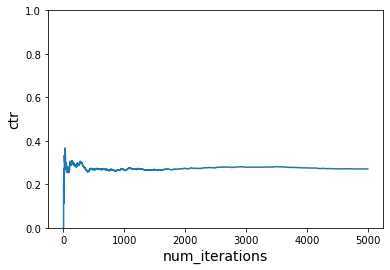

In [8]:
env=simple_news()
n_actions=5
actions=[i+1 for i in range(n_actions)]
agent = pyvw.vw("--cb_explore 5 --quiet --epsilon 0.1")
n_iter=5000
ctr,cost_sum=run_simulation(agent,env,actions,n_iter)
plot_ctr(n_iter, ctr)
print('Reward: ' +str(-1*cost_sum))